# Small version of the Don Quixote generative model

Best-performing version.

See `quixote-large` for a bigger version (stopped early during training).

Hyperparameters:
```plaintext
Hyperparameters(block_size=256, micro_steps=32, vocab_size=24540, n_layer=6, n_head=6, n_embd=384, dropout=0.2, bias=False, batch_size=64, epochs=5000, optimizer={'lr': 0.001, 'betas': (0.9, 0.99), 'eps': 1e-09}, scheduler={'decay_lr': True, 'warmup': 100, 'max': 5000, 'min_lr': 0.0001}, weight_decay=0.1, grad_clip=1.0, output_path='./output/', data_path='./dataset/quixote_oneline.txt', tokenizer={'path': None, 'bpe_path': './tokenization/tokenizer.model', 'k': None, 'special_symbols': {'[PAD]': 256, '[CLS]': 257, '[SEP]': 258}, 'vocab_size': 24540, 'tokenizer': None})
```

Transformer architecture:
```plaintext
GPT(
  (transformer): ModuleDict(
    (wte): Embedding(
      (embedding): Embedding(24540, 384)
    )
    (wpe): Embedding(
      (embedding): Embedding(256, 384)
    )
    (drop): Dropout(p=0.2, inplace=False)
    (h): ModuleList(
      (0-5): 6 x Block(
        (ln_1): LayerNorm()
        (attn): CausalSelfAttention(
          (c_attn): Linear(in_features=384, out_features=1152, bias=False)
          (c_proj): Linear(in_features=384, out_features=384, bias=False)
          (attn_dropout): Dropout(p=0.2, inplace=False)
          (resid_dropout): Dropout(p=0.2, inplace=False)
        )
        (ln_2): LayerNorm()
        (mlp): MLP(
          (c_fc): Linear(in_features=384, out_features=1536, bias=False)
          (gelu): GELU(approximate='none')
          (c_proj): Linear(in_features=1536, out_features=384, bias=False)
          (dropout): Dropout(p=0.2, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm()
  )
  (generator): Linear(in_features=384, out_features=24540, bias=False)
)
```

Vocabulary size: 24540

In [1]:
import torch
import pandas as pd

import sys
sys.path.append("..")
from quixote import Quixote

<Axes: xlabel='iteration (524288 training-tokens per iteration)'>

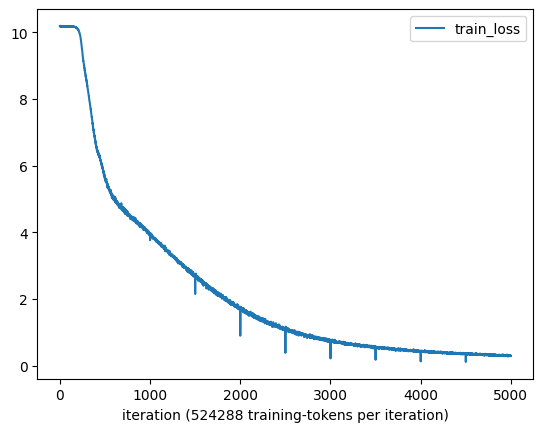

In [2]:
loss = pd.read_csv('loss.csv', header=0, index_col=0)
loss.index.name = f"iteration ({8 * 4 * 256 * 64} training-tokens per iteration)"
loss.plot(y="train_loss")

In [3]:
models = {
    "2000": torch.load("./model-2000.pth", map_location=torch.device('cpu')),
    "3000": torch.load("./model-3000.pth", map_location=torch.device('cpu')),
    "4000": torch.load("./model-4000.pth", map_location=torch.device('cpu')),
    "5000": torch.load("./model-5000.pth", map_location=torch.device('cpu'))
}
for model in models.values():
    model.config.device = "cpu"

In [4]:
prompts = ["“Here is the apple of which I spoke,” said Don Quixote,",
           "“My name is Hallvard, and I'm a student.”"]
temperatures = [1.0, 0.8, 0.5]
generate = 100
top_k = None

In [5]:
for prompt in prompts:
    print(f"\n\033[91m Prompt:\033[0m {prompt}")
    for temperature in temperatures:
        print(f"\n\033[91m Temperature:\033[0m {temperature}")
        for which, model in models.items():
            output = model(prompt, generate=generate, temperature=temperature, top_k=top_k)
            print(f"\033[91m {which}:\033[0m {output} ...")


 Prompt: “Here is the apple of which I spoke,” said Don Quixote,

 Temperature: 1.0
 2000: “Here is the apple of which I spoke,” said Don Quixote, “is it rare and pat to the purpose that you would gladly feel something to eat and labour to judge’s pledge.’” “At any rate,” observed Sancho, “and I might tell you more time without waiting for quarrel, as far from your worship is next to be marjoram and neither got up.” “Now I, señora,” said the price, “for you value on a heap of me.” “I do not know not tell you, Sancho,” said the curate, “that you had not ...
 3000: “Here is the apple of which I spoke,” said Don Quixote, “for I entreat you to call you your enemy to allow the expression of my own person in high degree, though I have a respect as my taste and at least to retain me, and support myself for even and even were it been the privilege of beauty to be breast without showing myself in the chaste fidelity of beauty;” and with great rage he began to weep bitterly, and with a heavy pe